In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from nltk import bleu
import pandas as pd
from nltk.translate.bleu_score import SmoothingFunction
import matplotlib.pyplot as plt
import numpy as np

Cloning first time

In [2]:
!git clone https://github.com/fly-back/e-CARE.git

Cloning into 'e-CARE'...
remote: Enumerating objects: 370, done.
remote: Counting objects: 100% (131/131), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 370 (delta 85), reused 77 (delta 39), pack-reused 239
Receiving objects: 100% (370/370), 2.37 MiB | 23.56 MiB/s, done.
Resolving deltas: 100% (200/200), done.


In [3]:
!pip install transformers
!pip install rouge
!pip install nlp
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 8.2 MB/s 
     |████████████████████████████████| 182 kB 63.2 MB/s 
     |████████████████████████████████| 7.6 MB 52.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 8.2 MB/s 
     |████████████████████████████████| 212 kB 74.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 7.0 MB/s 


In [4]:
%cd /content/e-CARE/code

/content/e-CARE/code


In [ ]:
!ls -a

.			  gpt2_generate.py    run.sh
..			  gpt2_multi_task.py  train_discriminate.py
adversarial_filtering.py  model		      train_multi_task.py
.DS_Store		  output	      utils
gpt2_discriminate.py	  README.md


In [ ]:
!bash run_multi.sh

2022-11-16 16:19:43,402 INFO    : [INFO] Loading Data
INFO:Discriminate logger:[INFO] Loading Data
2022-11-16 16:19:43,402 INFO    : [INFO] Mode:	discriminate_generate
INFO:Discriminate logger:[INFO] Mode:	discriminate_generate
2022-11-16 16:19:43,492 INFO    : [INFO] Tokenization and Padding for Data
INFO:Discriminate logger:[INFO] Tokenization and Padding for Data
2022-11-16 16:20:20,608 INFO    : [INFO] Creating Dataset and splitting batch for data
INFO:Discriminate logger:[INFO] Creating Dataset and splitting batch for data
2022-11-16 16:20:20,609 INFO    : [INFO] Loading pretrained model, setting optimizer and loss function
INFO:Discriminate logger:[INFO] Loading pretrained model, setting optimizer and loss function
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to

Mounted at /content/drive


In [ ]:
preds = pd.read_csv("gpt2_predict_20221115_193625.csv", names=['premise/hypothesis', 'reference', 'prediction'])

In [ ]:
ch = SmoothingFunction()
preds['avg_bleu'] = preds.apply(lambda row: bleu([row['reference']], row['prediction'], smoothing_function=ch.method1), axis=1)

In [ ]:
preds['avg_bleu']

0       2.220268e-01
1       4.113069e-01
2       1.995310e-01
3       1.328364e-01
4       5.114035e-01
            ...     
2127    4.971383e-01
2128    3.413692e-01
2129    3.260575e-01
2130    5.081596e-10
2131    1.819611e-01
Name: avg_bleu, Length: 2132, dtype: float64

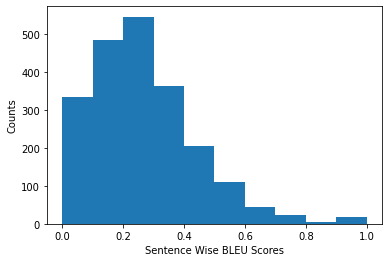

In [ ]:
plt.hist(preds['avg_bleu'])
plt.xlabel('Sentence Wise BLEU Scores')
plt.ylabel('Counts')

plt.savefig('hist.png')